#Reading Dataset

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('/content/CarPricesData.csv')

In [3]:
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [4]:
print('Shape before deleting duplicate values:', CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)


In [5]:
# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

Shape After deleting duplicate values: (1435, 10)


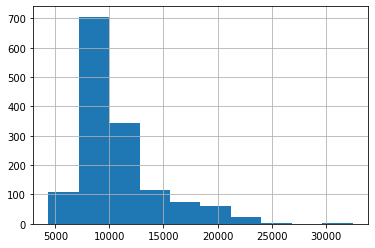

In [6]:
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

#Data Pre Analysis and Visualization.

In [7]:
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


So,There are some missing values which will be treated later.

In [8]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [9]:
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [18]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,10))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

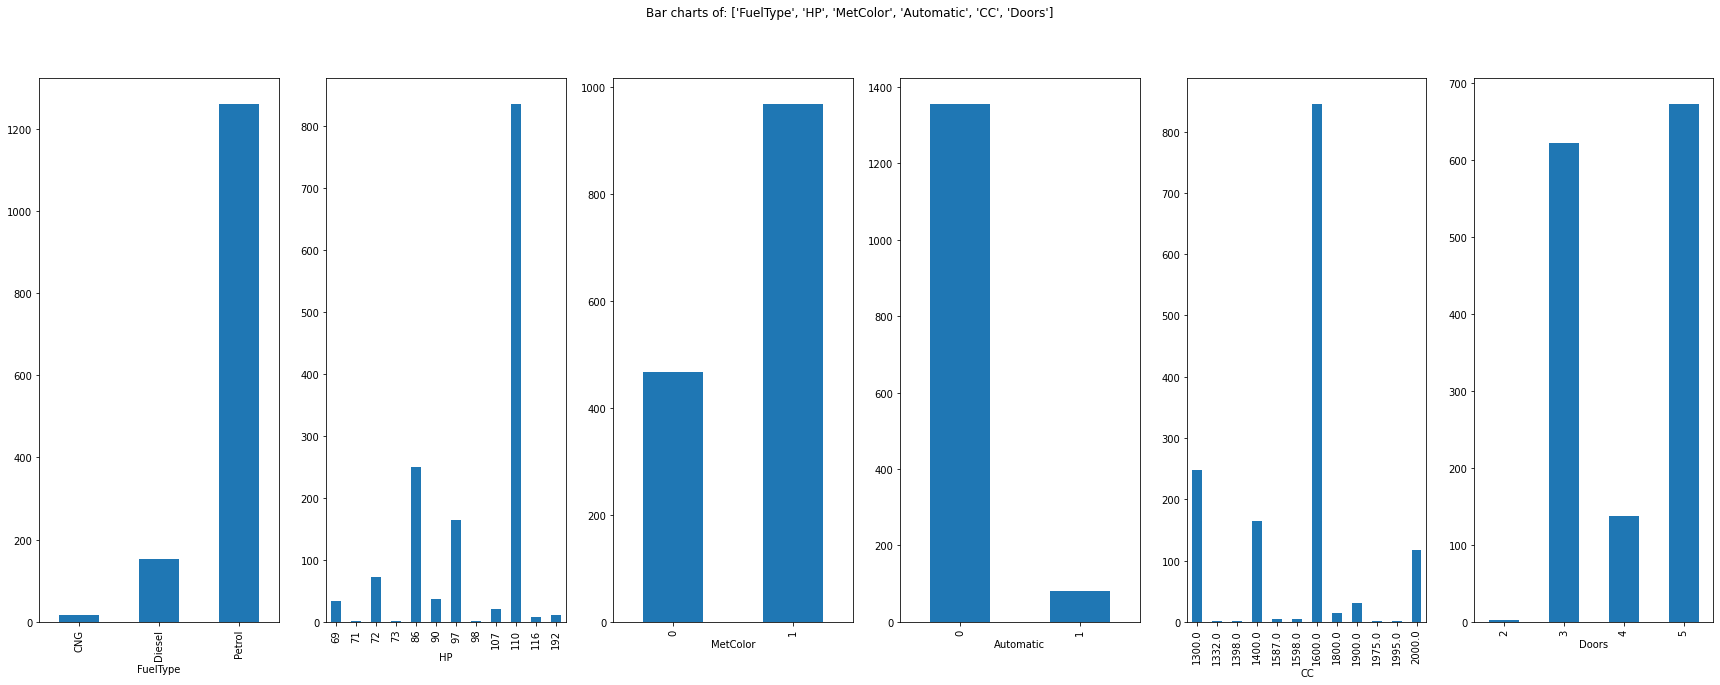

In [19]:
#Plotting all the categorical features' characteristics
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0608aff90>,
      dtype=object)

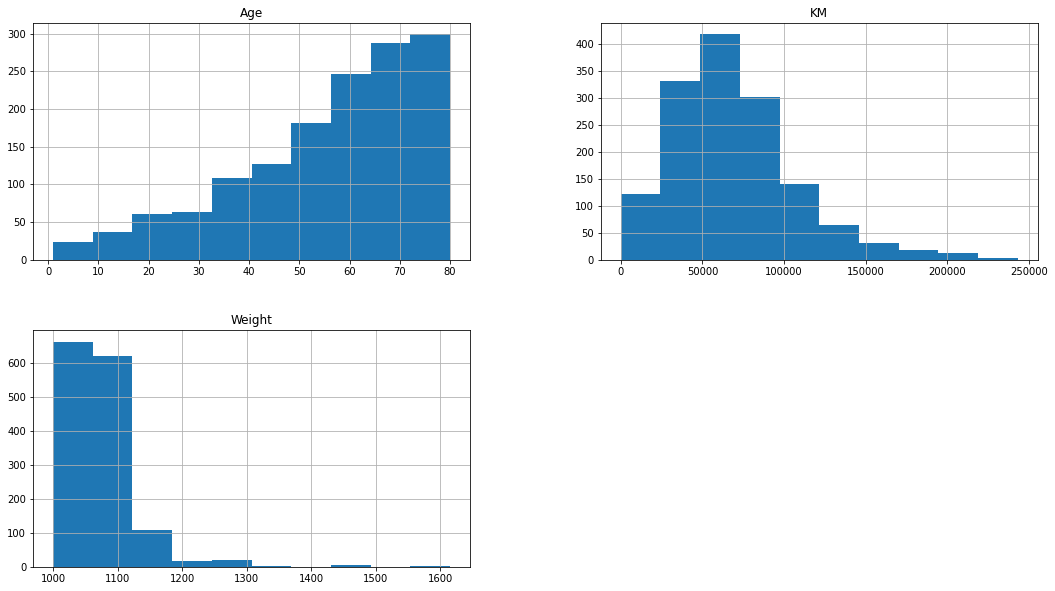

In [20]:
# Plotting histograms of multiple continuous columns together
CarPricesData.hist(['Age','KM','Weight'], figsize=(18,10))

In [21]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

138     1320.0
112     1320.0
115     1280.0
68      1275.0
119     1275.0
         ...  
690     1000.0
1410    1000.0
957     1000.0
927     1000.0
1000    1000.0
Name: Weight, Length: 1428, dtype: float64

In [21]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

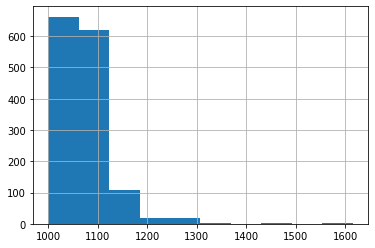

In [22]:
# Histogram for weight after outlier treatment
CarPricesData['Weight'].hist()

In [23]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [24]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [25]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [26]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

#Feature Selection

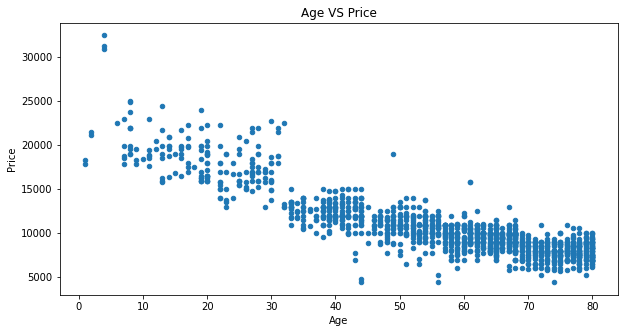

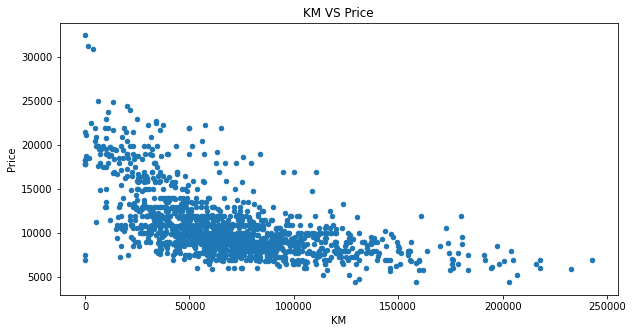

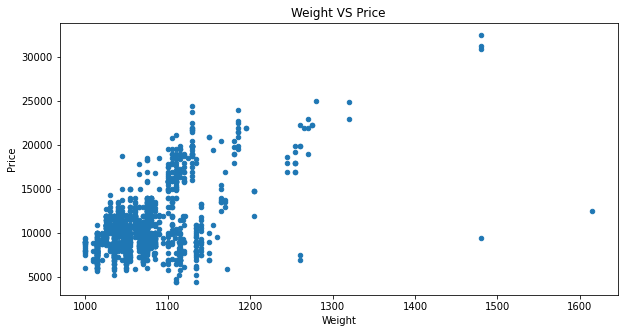

In [27]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [28]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.874196,-0.569420,0.575767
Age,-0.874196,1.000000,0.502604,-0.465113
KM,-0.569420,0.502604,1.000000,-0.024248
Weight,0.575767,-0.465113,-0.024248,1.000000


In [29]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable, as here considering thresold 0.5
#there are columns to consider.
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.874196
KM       -0.569420
Weight    0.575767
Name: Price, dtype: float64

In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [31]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

In [32]:
#Selecting the useful features.
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [36]:
CarPricesData

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


#Building Model

In [53]:
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

In [54]:
X=DataForML
y=CarPricesData['Price']

In [55]:
### Sandardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##Linear Regression

In [56]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.8555096125775492

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0      NaN         16676.0
1  13750.0         11401.0
2      NaN          8480.0
3  14950.0         10123.0
4  13750.0          8668.0
Mean Accuracy on test data: 64.71577178558218
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [88.56760465 89.10169587 88.14261529 91.92822999 89.53895835 91.5881939
 90.90567085 87.37511596 90.38793752 88.41900007]

Final Average Accuracy of the model: 89.6


##Decision Tree Regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.8556876622042626

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0      NaN         16867.0
1  13750.0         11735.0
2      NaN          9418.0
3  14950.0          9418.0
4  13750.0          9418.0
Mean Accuracy on test data: 65.04732209475719
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [83.45164595 87.52441085 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]

Final Average Accuracy of the model: 87.84


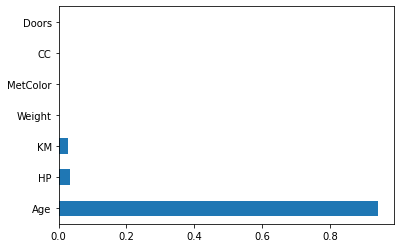

In [57]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##Random Forest Regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2 Value: 0.8736282267134765

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0      NaN         17004.0
1  13750.0         11360.0
2      NaN          9401.0
3  14950.0          9772.0
4  13750.0          9401.0
Mean Accuracy on test data: 64.46484764060006
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [81.16517874 88.48632344 87.47255242 88.44643226 87.11582366 90.52908601
 92.06497348 85.65580664 91.27951147 89.33075701]

Fi

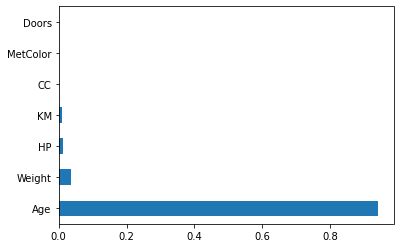

In [58]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##KNN

In [59]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
R2 Value: 0.9376579468637175

##### Model Validation and Accuracy Calculations ##########
     Price  PredictedPrice
0      NaN         16317.0
1  13750.0          9627.0
2      NaN          8550.0
3  14950.0          9700.0
4  13750.0          8217.0
Mean Accuracy on test data: 63.62346928074844
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [76.37865325 88.02051453 89.16946873 87.85989878 87.63782911 90.12642216
 89.9031091  84.69153641 89.18649306 87.66152295]

Final Average Accuracy of the model: 87.06


So,here we see that respect to different model 87-89% accuracy is coming, linear regression model gives the most accuracy with its simple algorithm which will reduce time complexity as well, So I choose 'Linear Regression Model' for this dataset Price prediction.